In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(10,4))
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 수집 및 전처리
* 행정안전부<br>
https://www.mois.go.kr/<br>
정책자료 > 주민등록인구통계<br>
전체읍면동 현황<br><br>
* 바로가기<br>
https://jumin.mois.go.kr/index.jsp

#### 데이터프레임 생성

In [ ]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------
data_file = 'data/202503_202503_주민등록인구및세대현황_월간.csv'
df_all = pd.read_csv(data_file, 
                     encoding='cp949',
                     thousands=',')

In [202]:
df_all.head()

,행정구역,2025년03월_총인구수,2025년03월_세대수,2025년03월_세대당 인구,2025년03월_남자 인구수,2025년03월_여자 인구수,2025년03월_남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92


In [203]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             3913 non-null   object 
 1   2025년03월_총인구수    3913 non-null   int64  
 2   2025년03월_세대수     3913 non-null   int64  
 3   2025년03월_세대당 인구  3913 non-null   float64
 4   2025년03월_남자 인구수  3913 non-null   int64  
 5   2025년03월_여자 인구수  3913 non-null   int64  
 6   2025년03월_남여 비율   3913 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 214.1+ KB


#### 컬럼명 변경

In [204]:
# ------------------------
# ['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']
# ------------------------

df_all.columns=['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']
df_all.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93


#### 파생컬럼 추가
* 행정구역별
    * 행정구역 컬럼에서 행정구역명만 분리
* str 접근자
    * 시리즈나 컬럼에 문자열 메소드를 적용할 때 사용
        * 예) `컬럼.str.replace(' ', '')`    
    * 시리즈나 컬럼의 문자열 인덱스/슬라이스를 할 때 사용
        * 예) `컬럼.str[3:]`

In [205]:
# ------------------------
# 행정구역명 컬럼 추가
# ------------------------

df_all['행정구역명'] = df_all['행정구역'].str.split(' ').str[0]

In [206]:
df_all.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93,서울특별시
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84,서울특별시
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79,서울특별시
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92,서울특별시


## 행정구역별 인구구조 분석
#### 데이터 준비
* 행정구역 레벨의 데이터 조건
    * 행정구역코드가 '00000000'(8자리)로 끝남

In [207]:
# ------------------------
# 행정구역 단위 데이터만 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------

cond = df_all['행정구역'].str[-9:-1]=='00000000'
df_region1 = df_all.loc[cond].copy()

#### 행정구역별 총 인구수 시각화
* 인구수가 많은 행정구역부터 내림차순 정렬
* 정렬된 데이터로 시각화

In [208]:
# -----------------------------------------
# 총 인구수 많은 순으로 정렬
# -----------------------------------------

df_region1.sort_values('총인구수', 
                    ascending=False,
                    inplace=True)

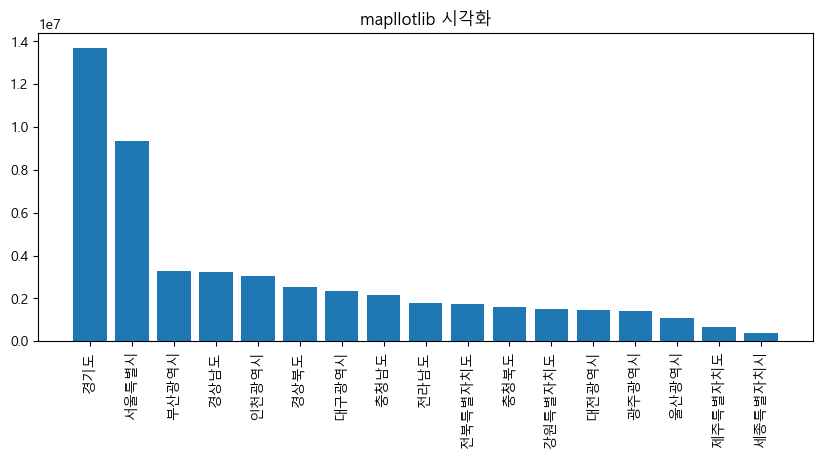

In [209]:
# ------------------------
# matplotlib으로 시각화
# ------------------------

plt.bar(df_region1['행정구역명'], df_region1['총인구수'])
plt.title('mapllotlib 시각화')
plt.xticks(rotation=90);

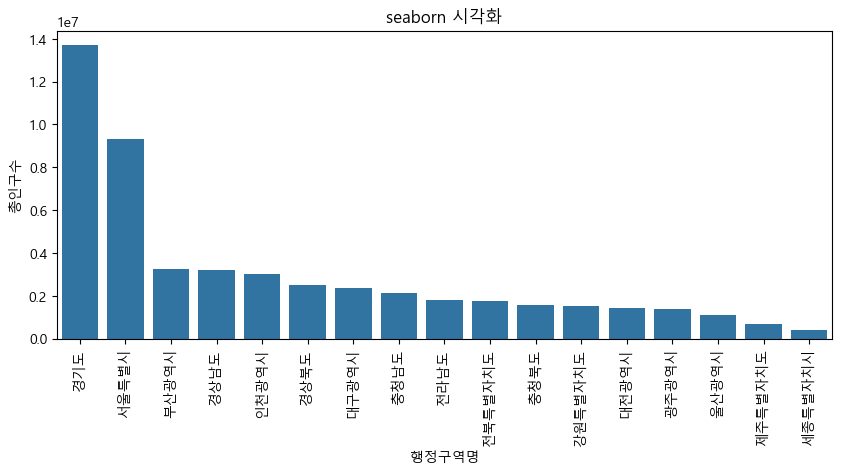

In [210]:
# ------------------------
# seaborn으로 시각화
# ------------------------

sns.barplot(data=df_region1, x='행정구역명', y='총인구수')
plt.title('seaborn 시각화')
plt.xticks(rotation=90);

### 행정구역별 남녀 인구수 시각화
* melt 후 seaborn 시각화

In [211]:
# -----------------------
# melt
#   df_region1_melt
# -----------------------

df_region1_melt = df_region1[['행정구역명','남자 인구수','여자 인구수']]\
    .melt(id_vars='행정구역명', var_name='성별', value_name='인구수')

In [212]:
df_region1_melt

,행정구역명,성별,인구수
0,경기도,남자 인구수,6883349
1,서울특별시,남자 인구수,4504618
2,부산광역시,남자 인구수,1585597
3,경상남도,남자 인구수,1623318
4,인천광역시,남자 인구수,1514643
5,경상북도,남자 인구수,1276834
6,대구광역시,남자 인구수,1157424
7,충청남도,남자 인구수,1095977
8,전라남도,남자 인구수,901154
9,전북특별자치도,남자 인구수,863734


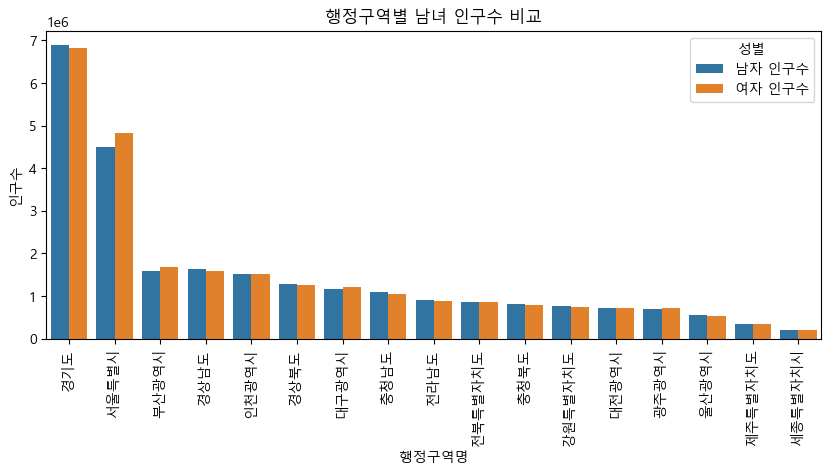

In [213]:
# -----------------------
# 남녀 인구수 막대그래프
# -----------------------

sns.barplot(data=df_region1_melt, x='행정구역명', y='인구수', 
            estimator='sum', hue='성별')
plt.xticks(rotation=90)
plt.title('행정구역별 남녀 인구수 비교');


## 시군구별 인구수 시각화

#### 데이터 준비

In [214]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

region_select = input('분석할 행정구역명 : ')
cond = df_all['행정구역명'].str.contains(region_select)
region_select = df_all.loc[cond, '행정구역명'].drop_duplicates()
region_select = region_select.iloc[0]

print('분석할 행정구역명 : ', region_select)



분석할 행정구역명 :  부산광역시


In [215]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '000000'(8자리) 로 끝나지 않음
# ----------------------

cond1 = df_all['행정구역명'] == region_select
cond2 = df_all['행정구역'].str[-7:-1] == '000000'
cond3 = df_all['행정구역'].str[-9:-1] != '00000000'

df_region2 = df_all[cond1 & cond2 & cond3].copy()
df_region2



,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시


In [216]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------

df_region2['시군구명'] = df_region2['행정구역'].str.split(' ').str[1]
df_region2

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,시군구명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시,중구
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시,서구
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시,동구
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시,영도구
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,부산진구
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시,동래구
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시,남구
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시,북구
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시,해운대구
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시,사하구


In [217]:
# -------------------
# 총인구수 내림차순 정렬
# --------------------

df_region2.sort_values('총인구수', ascending=False, inplace=True)

In [218]:
# -------------------
# seaborn 시각화를 위한 melt
# --------------------
df_region2_melt = \
    df_region2[['시군구명','남자 인구수', '여자 인구수']]\
        .melt(id_vars='시군구명', var_name='성별', value_name='인구수')

#### 시각화

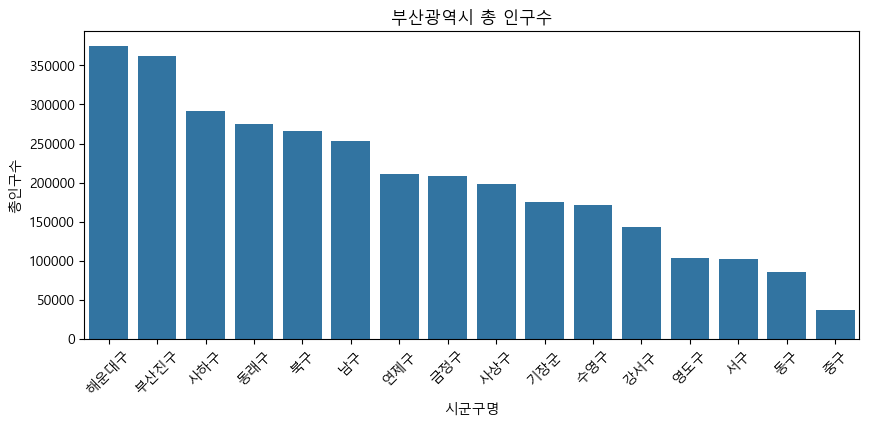

In [219]:
# -------------------
# 총인구수
# --------------------
sns.barplot(data=df_region2, x='시군구명', y='총인구수')
plt.title(f'{region_select} 총 인구수');
plt.xticks(rotation=45);

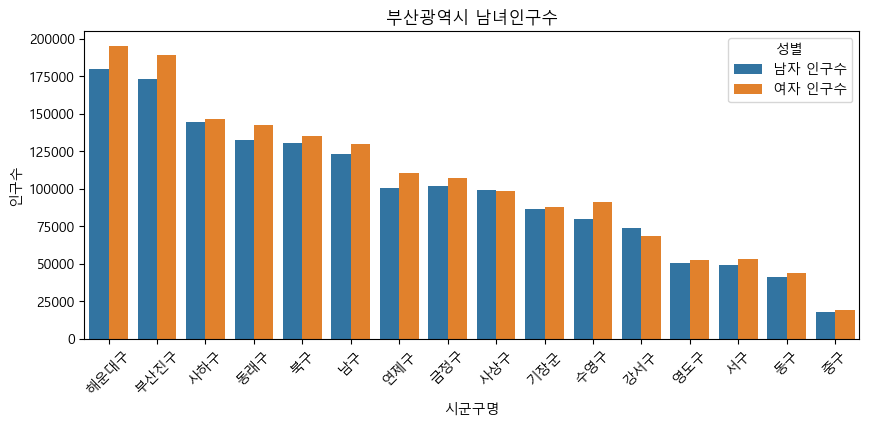

In [220]:
sns.barplot(data=df_region2_melt, x='시군구명', y='인구수',
            hue='성별')
plt.title(f'{region_select} 남녀인구수')
plt.xticks(rotation=45)
pass

## 읍면동 인구수 시각화

#### 데이터 준비

In [221]:
# --------------------------------------------------------
# 행정구역의 읍면동 데이터 선택
#   - 변수명 : df_region3
# --------------------------------------------------------
cond1 = df_all['행정구역명']==region_select
cond2 = df_all['행정구역'].str[-9:-1]!='00000000'
cond3 = df_all['행정구역'].str[-7:-1]!='000000'
cond4 = df_all['행정구역'].str[-6:-1]!='00000'

df_region3 = df_all[cond1&cond2&cond3&cond4].copy()

In [222]:
# --------------------------------------------------------
# '시군구' 칼럼 추가
# '읍면동' 컬럼 추가
# '시군구 읍면동' 칼럼 추가
# --------------------------------------------------------

df_region3['시군구'] = df_region3['행정구역'].str.split(' ').str[1]
df_region3['읍면동'] = df_region3['행정구역'].str.split(' ').str[2].str.split('(').str[0]
df_region3['시군구 읍면동'] = df_region3['시군구'] + ' ' + df_region3['읍면동'] 

In [223]:
# --------------------------------------------------------
# 읍면동별 총인구수 내림차순 정렬
# --------------------------------------------------------

df_region3.sort_values('총인구수', ascending=False, inplace=True)

### 시각화

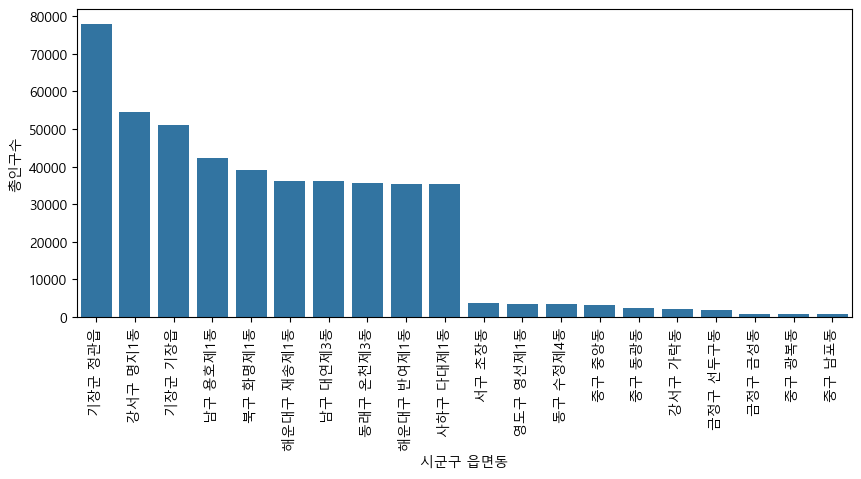

In [224]:
# --------------------------------------------------------
# 총 인구수 많은 10개 동과 적은 10개 동을 concat하여 시각화
# ---------------------------------------------------------
df_region3_subset = pd.concat([df_region3[:10], df_region3[-10:]])

sns.barplot(data=df_region3_subset, x='시군구 읍면동', y='총인구수')
plt.xticks(rotation=90)
pass